In [1]:
import os
import re
from operator import itemgetter
from textwrap import dedent
from typing import List

import pandas as pd
import seaborn as sns
from dotenv import load_dotenv
from rich import print


load_dotenv()
os.environ["LANGCHAIN_PROJECT"] = "llm-evals"
%load_ext rich
%load_ext autoreload

%autoreload 2

In [2]:
from financial_chat.fetch_documents import get_company_filing
from financial_chat.chunk_load import (
    chunk_items,
    check_if_documents_exist,
    load_documents,
)
from financial_chat.schema import ReportParams

from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate


[00:28:29] INFO     Identity of the Edgar REST client set to [lazy@lazyg.com]                           ]8;id=817686;file://e:\Projects\AI-Maven\AIE3\.venv\Lib\site-packages\edgar\core.py\core.py]8;;\:]8;id=664154;file://e:\Projects\AI-Maven\AIE3\.venv\Lib\site-packages\edgar\core.py#147\147]8;;\

In [4]:
from financial_chat.graph import create_graph
from IPython.display import Image

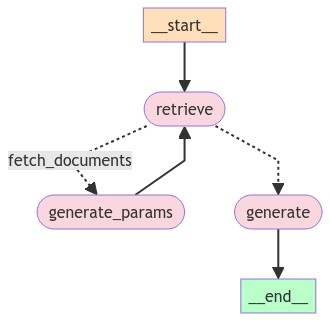

In [26]:
graph = create_graph()

Image(graph.get_graph().draw_mermaid_png())

In [34]:
response = graph.invoke(
    input={
        "messages": ("user", "What technologies is Meta investing in the heaviest?")
    }
)

[00:57:46] INFO     Retrieving documents...                                                             graph.py:50

           INFO     Generated Query: query='technologies Meta investing' filter=None limit=None         ]8;id=473357;file://e:\Projects\AI-Maven\AIE3\.venv\Lib\site-packages\langchain\retrievers\self_query\base.py\base.py]8;;\:]8;id=457731;file://e:\Projects\AI-Maven\AIE3\.venv\Lib\site-packages\langchain\retrievers\self_query\base.py#267\267]8;;\

[00:57:47] INFO     Documents retrieved: [Document(page_content='interfaces, and other foundational     graph.py:55
                    technologies for the metaverse. Our RL investments include expenses relating to                
                    headcount and technology development across these efforts. Many of our RL                      
                    investments are directed toward long-term, cutting-edge research and development               
                    for products for the metaverse that are not on the market today and may only be                
                    fully realized in the next decade. Although it is inherently difficult to predict              
                    when and how the metaverse ecosystem will develop, we expect our RL segment to                 
                    continue to operate at a loss for the foreseeable future, and our ability to                   
                    support our metaverse efforts is dependent on generating sufficient profits from               
                    other areas of our business. We expect this will be a complex, evolving, and                   
                    long-term initiative. We are investing now because we believe this is the next                 
                    chapter of the internet and will unlock monetization opportunities for businesses,             
                    developers, and creators, including around advertising, hardware, and digital                  
                    goods. Table of Contents  Trends in', metadata={'form': '10-K', 'year': 2023,                  
                    'ticker': 'META', 'item_name': 'Item 7'}), Document(page_content="advertiser                   
                    spending decisions and our assessments involve complex judgments about what is                 
                    driving advertising decisions across a large and diversified advertiser base across            
                    the globe. Trends impacting advertising spend are also dynamic and interrelated. As            
                    a result, it is difficult to identify with precision which advertiser spending                 
                    decisions are attributable to which trends, and we are unable to quantify the exact            
                    impact that each trend had on our advertising revenue during the periods presented.            
                    Investment Philosophy In 2022, we continued to invest based on the following                   
                    company priorities: (i) continue making progress on the major social issues facing             
                    the internet and our company, including privacy, safety, and security; (ii) build              
                    new experiences that meaningfully improve people's lives today and set the stage               
                    for even bigger improvements in the future; (iii) keep building our business by                
                    supporting the millions of businesses that rely on our services to grow and create             
                    jobs; and (iv) communicate more", metadata={'form': '10-K', 'year': 2023, 'ticker':            
                    'META', 'item_name': 'Item 7'}), Document(page_content="millions of businesses that            
                    rely on our services to grow and create jobs; and (iv) communicate more                        
                    transparently about what we're doing and the role our services play in the world.              
                    We anticipate that investments in our data center capacity, servers, network                   
                    infrastructure, and headcount will continue to drive expense growth in 2023, which             
                    will adversely affect our operating margin and profitability. The majority of our              
                    investments are directed toward deve

           INFO     Checking if documents need to be fetched...                                         graph.py:75

           INFO     State: {'documents': [Document(page_content='interfaces, and other foundational     graph.py:76
                    technologies for the metaverse. Our RL investments include expenses relating to                
                    headcount and technology development across these efforts. Many of our RL                      
                    investments are directed toward long-term, cutting-edge research and development               
                    for products for the metaverse that are not on the market today and may only be                
                    fully realized in the next decade. Although it is inherently difficult to predict              
                    when and how the metaverse ecosystem will develop, we expect our RL segment to                 
                    continue to operate at a loss for the foreseeable future, and our ability to                   
                    support our metaverse efforts is dependent on generating sufficient profits from               
                    other areas of our business. We expect this will be a complex, evolving, and                   
                    long-term initiative. We are investing now because we believe this is the next                 
                    chapter of the internet and will unlock monetization opportunities for businesses,             
                    developers, and creators, including around advertising, hardware, and digital                  
                    goods. Table of Contents  Trends in', metadata={'form': '10-K', 'year': 2023,                  
                    'ticker': 'META', 'item_name': 'Item 7'}), Document(page_content="advertiser                   
                    spending decisions and our assessments involve complex judgments about what is                 
                    driving advertising decisions across a large and diversified advertiser base across            
                    the globe. Trends impacting advertising spend are also dynamic and interrelated. As            
                    a result, it is difficult to identify with precision which advertiser spending                 
                    decisions are attributable to which trends, and we are unable to quantify the exact            
                    impact that each trend had on our advertising revenue during the periods presented.            
                    Investment Philosophy In 2022, we continued to invest based on the following                   
                    company priorities: (i) continue making progress on the major social issues facing             
                    the internet and our company, including privacy, safety, and security; (ii) build              
                    new experiences that meaningfully improve people's lives today and set the stage               
                    for even bigger improvements in the future; (iii) keep building our business by                
                    supporting the millions of businesses that rely on our services to grow and create             
                    jobs; and (iv) communicate more", metadata={'form': '10-K', 'year': 2023, 'ticker':            
                    'META', 'item_name': 'Item 7'}), Document(page_content="millions of businesses that            
                    rely on our services to grow and create jobs; and (iv) communicate more                        
                    transparently about what we're doing and the role our services play in the world.              
                    We anticipate that investments in our data center capacity, servers, network                   
                    infrastructure, and headcount will continue to drive expense growth in 2023, which             
                    will adversely affect our operating margin and profitability. The majority of our              
                    investments are directed toward deve

           INFO     Generating answer...                                                                graph.py:61

In [35]:
print(response["messages"][-1].content)

Meta is investing heavily in developing technologies for the metaverse. This includes virtual and augmented reality
devices, software for social platforms, neural interfaces, and other foundational technologies for the metaverse. 
Additionally, they are investing in long-term research and development for products that may only be fully realized
in the next decade.